# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install mxnet==1.9.1
!pip install bokeh==3.5.2

!pip install --upgrade autogluon --no-cache-dir

# Without --no-cache-dir, smaller aws instances may have trouble installing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 60.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.8 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 97.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [mxnet]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 140.2 MB/s eta 0:00:00
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.7.3
    Uninstalling bokeh-3.7.3:
      Successfully uninsta

### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "khatoonintech"
kaggle_key = "91ae28a1c2fb3e5353a88a305b8d253c"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 523MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv", parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv", parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
predictor = TabularPredictor(
    label="count",
    problem_type="regression",
    eval_metric="root_mean_squared_error"
    ).fit(
        train.drop(columns=["casual", "registered"]),
        time_limit=600,
        presets="best_quality"
        )

No path specified. Models will be saved in: "AutogluonModels/ag-20250606_173057"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       11.52 GB / 12.67 GB (90.9%)
Disk Space Avail:   71.54 GB / 112.64 GB (63.5%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

(_ray_fit pid=1924) [1000]	valid_set's rmse: 130.657
(_ray_fit pid=2094) [1000]	valid_set's rmse: 132.725 [repeated 5x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=2148) [2000]	valid_set's rmse: 126.702 [repeated 2x across cluster]
(_ray_fit pid=2212) [2000]	valid_set's rmse: 134.443 [repeated 5x across cluster]
(_ray_fit pid=2148) [9000]	valid_set's rmse: 125.618 [repeated 7x across cluster]
(_ray_fit pid=2212) [9000]	valid_set's rmse: 132.422 [repeated 4x across cluster]
(_ray_fit pid=2329) [1000]	valid_set's rmse: 137.712
(_ray_fit pid=2329) [2000]	valid_set's rmse: 136.347
(_ray_fit pid=2329) [3000]	valid_set's rmse: 135.865
(_ray_fit pid=2329) [4000]	valid_set's rmse: 135.344
(_ray_fit pid=2394) [2000]	valid_set's rmse: 138.865 [repeated 3x across cluster]
(_ray_fit pid=2394) [5000]	val

(_dystack pid=1757) 	-131.9758	 = Validation score   (-root_mean_squared_error)
(_dystack pid=1757) 	69.72s	 = Training   runtime
(_dystack pid=1757) 	6.01s	 = Validation runtime
(_dystack pid=1757) Fitting model: LightGBM_BAG_L1 ... Training model for up to 20.14s of the 67.22s of remaining time.
(_dystack pid=1757) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)


(_ray_fit pid=2507) [1000]	valid_set's rmse: 129.274
(_ray_fit pid=2506) [1000]	valid_set's rmse: 129.285
(_ray_fit pid=2610) [1000]	valid_set's rmse: 135.098
(_ray_fit pid=2702) [1000]	valid_set's rmse: 124.896
(_ray_fit pid=2809) [1000]	valid_set's rmse: 134.479 [repeated 2x across cluster]


(_dystack pid=1757) 	-131.8496	 = Validation score   (-root_mean_squared_error)
(_dystack pid=1757) 	32.75s	 = Training   runtime
(_dystack pid=1757) 	1.24s	 = Validation runtime
(_dystack pid=1757) Fitting model: WeightedEnsemble_L2 ... Training model for up to 141.42s of the 30.97s of remaining time.
(_dystack pid=1757) 	Ensemble Weights: {'KNeighborsDist_BAG_L1': 1.0}
(_dystack pid=1757) 	-89.9469	 = Validation score   (-root_mean_squared_error)
(_dystack pid=1757) 	0.01s	 = Training   runtime
(_dystack pid=1757) 	0.0s	 = Validation runtime
(_dystack pid=1757) Fitting 106 L2 models, fit_strategy="sequential" ...
(_dystack pid=1757) Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 30.95s of the 30.93s of remaining time.
(_dystack pid=1757) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.12%)


(_ray_fit pid=2920) [1000]	valid_set's rmse: 68.8067 [repeated 2x across cluster]
(_ray_fit pid=3022) [1000]	valid_set's rmse: 78.2341 [repeated 2x across cluster]
(_ray_fit pid=3134) [1000]	valid_set's rmse: 75.8581 [repeated 2x across cluster]
(_ray_fit pid=3246) [1000]	valid_set's rmse: 71.9787 [repeated 2x across cluster]


(_dystack pid=1757) 	-73.6831	 = Validation score   (-root_mean_squared_error)
(_dystack pid=1757) 	39.0s	 = Training   runtime
(_dystack pid=1757) 	2.0s	 = Validation runtime
(_dystack pid=1757) Fitting model: WeightedEnsemble_L3 ... Training model for up to 141.42s of the -11.72s of remaining time.
(_dystack pid=1757) 	Ensemble Weights: {'LightGBMXT_BAG_L2': 0.958, 'KNeighborsDist_BAG_L1': 0.042}
(_dystack pid=1757) 	-73.6478	 = Validation score   (-root_mean_squared_error)
(_dystack pid=1757) 	0.01s	 = Training   runtime
(_dystack pid=1757) 	0.0s	 = Validation runtime
(_dystack pid=1757) AutoGluon training complete, total runtime = 153.24s ... Best model: WeightedEnsemble_L3 | Estimated inference throughput: 130.6 rows/s (1210 batch size)
(_dystack pid=1757) TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-20250606_173057/ds_sub_fit/sub_fit_ho")
(_dystack pid=1757) Deleting DyStack predictor artifacts (clean_up_fits=True) ...
Leade

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
import numpy as np
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.099358  root_mean_squared_error      18.592152  428.373938                0.000499           0.032800            3       True         13
1   RandomForestMSE_BAG_L2  -53.397454  root_mean_squared_error      13.786805  339.305918                0.602163          42.262017            2       True         12
2          LightGBM_BAG_L2  -55.017601  root_mean_squared_error      13.495794  326.378591                0.311152          29.334690            2       True         11
3        LightGBMXT_BAG_L2  -60.712057  root_mean_squared_error      17.678338  356.744431                4.493696          59.700530            2       True         10
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.088710    0.050177   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': np.float64(-101.54619908446061),
  'KNeighborsDist_BAG_L1': np.float64(-84.12506123181602),
  'LightGBMXT_BAG_L1': np.float64(-131.46090891834504),
  'LightGBM_BAG_L1': np.float64(-131.054161598899),
  'RandomForestMSE_BAG_L1': np.float64(-1

In [ ]:
predictor.leaderboard(extra_info=True, silent=True)


,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order,...,hyperparameters,hyperparameters_fit,ag_args_fit,features,compile_time,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants
0,WeightedEnsemble_L3,-53.099358,root_mean_squared_error,18.592152,428.373938,0.000499,0.032800,3,True,13,...,"{'use_orig_features': False, 'valid_stacker': True, 'max_base_models': 0, 'max_base_models_per_type': 'auto', 'save_bag_folds': True, 'stratify': 'auto', 'bin': 'auto', 'n_bins': None}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[LightGBM_BAG_L2, LightGBMXT_BAG_L2, RandomForestMSE_BAG_L2]",None,"{'ensemble_size': 25, 'subsample_size': 1000000}",{'ensemble_size': 25},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[KNeighborsDist_BAG_L1, LightGBMXT_BAG_L2, LightGBM_BAG_L1, NeuralNetFastAI_BAG_L1, RandomForestMSE_BAG_L1, LightGBM_BAG_L2, ExtraTreesMSE_BAG_L1, KNeighborsUnif_BAG_L1, CatBoost_BAG_L1, RandomForestMSE_BAG_L2, LightGBMXT_BAG_L1]",[]
1,RandomForestMSE_BAG_L2,-53.397454,root_mean_squared_error,13.786805,339.305918,0.602163,42.262017,2,True,12,...,"{'use_orig_features': True, 'valid_stacker': True, 'max_base_models': 0, 'max_base_models_per_type': 'auto', 'save_bag_folds': True, 'stratify': 'auto', 'bin': 'auto', 'n_bins': None, 'use_child_oof': True}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[KNeighborsDist_BAG_L1, workingday, holiday, datetime.year, temp, datetime.month, LightGBMXT_BAG_L1, humidity, windspeed, KNeighborsUnif_BAG_L1, season, NeuralNetFastAI_BAG_L1, ExtraTreesMSE_BAG_L1, datetime.dayofweek, CatBoost_BAG_L1, datetime, weather, datetime.day, atemp, LightGBM_BAG_L1, RandomForestMSE_BAG_L1]",None,"{'n_estimators': 300, 'max_leaf_nodes': 15000, 'n_jobs': -1, 'random_state': 0, 'bootstrap': True, 'criterion': 'squared_error'}",{'n_estimators': 300},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': ['bool', 'int', 'float', 'category'], 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None}","[KNeighborsDist_BAG_L1, LightGBM_BAG_L1, NeuralNetFastAI_BAG_L1, RandomForestMSE_BAG_L1, ExtraTreesMSE_BAG_L1, KNeighborsUnif_BAG_L1, CatBoost_BAG_L1, LightGBMXT_BAG_L1]",[WeightedEnsemble_L3]
2,LightGBM_BAG_L2,-55.017601,root_mean_squared_error,13.495794,326.378591,0.311152,29.334690,2,True,11,...,"{'use_orig_features': True, 'valid_stacker': True, 'max_base_models': 0, 'max_base_models_per_type': 'auto', 'save_bag_folds': True, 'stratify': 'auto', 'bin': 'auto', 'n_bins': None}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_feat

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test )
predictions.head()

,count
0,22.716166
1,42.232826
2,45.892677
3,48.892708
4,50.886086


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

,count
count,6493.000000
mean,100.591576
std,89.714500
min,3.225851
25%,19.977213
50%,63.602341
75%,166.140305
max,368.273132


In [ ]:
# How many negative values do we have?
neg=predictions[predictions<0].sum()
print(neg)

0.0


In [ ]:
# Set them to zero


### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:01<00:00, 163kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description           status                     publicScore  privateScore  
---------------------------  --------------------------  --------------------  -------------------------  -----------  ------------  
submission.csv               2025-06-06 17:42:45.863000  first raw submission  SubmissionStatus.PENDING                              
submission.csv               2025-06-06 17:18:42.820000  first raw submission  SubmissionStatus.COMPLETE  1.79993      1.79993       
submission.csv               2025-06-06 16:59:08.073000  first raw submission  SubmissionStatus.COMPLETE  1.80009      1.80009       
submission.csv               2025-06-06 16:38:55.227000  first raw submission  SubmissionStatus.ERROR                                


#### Initial score of `1.79993`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

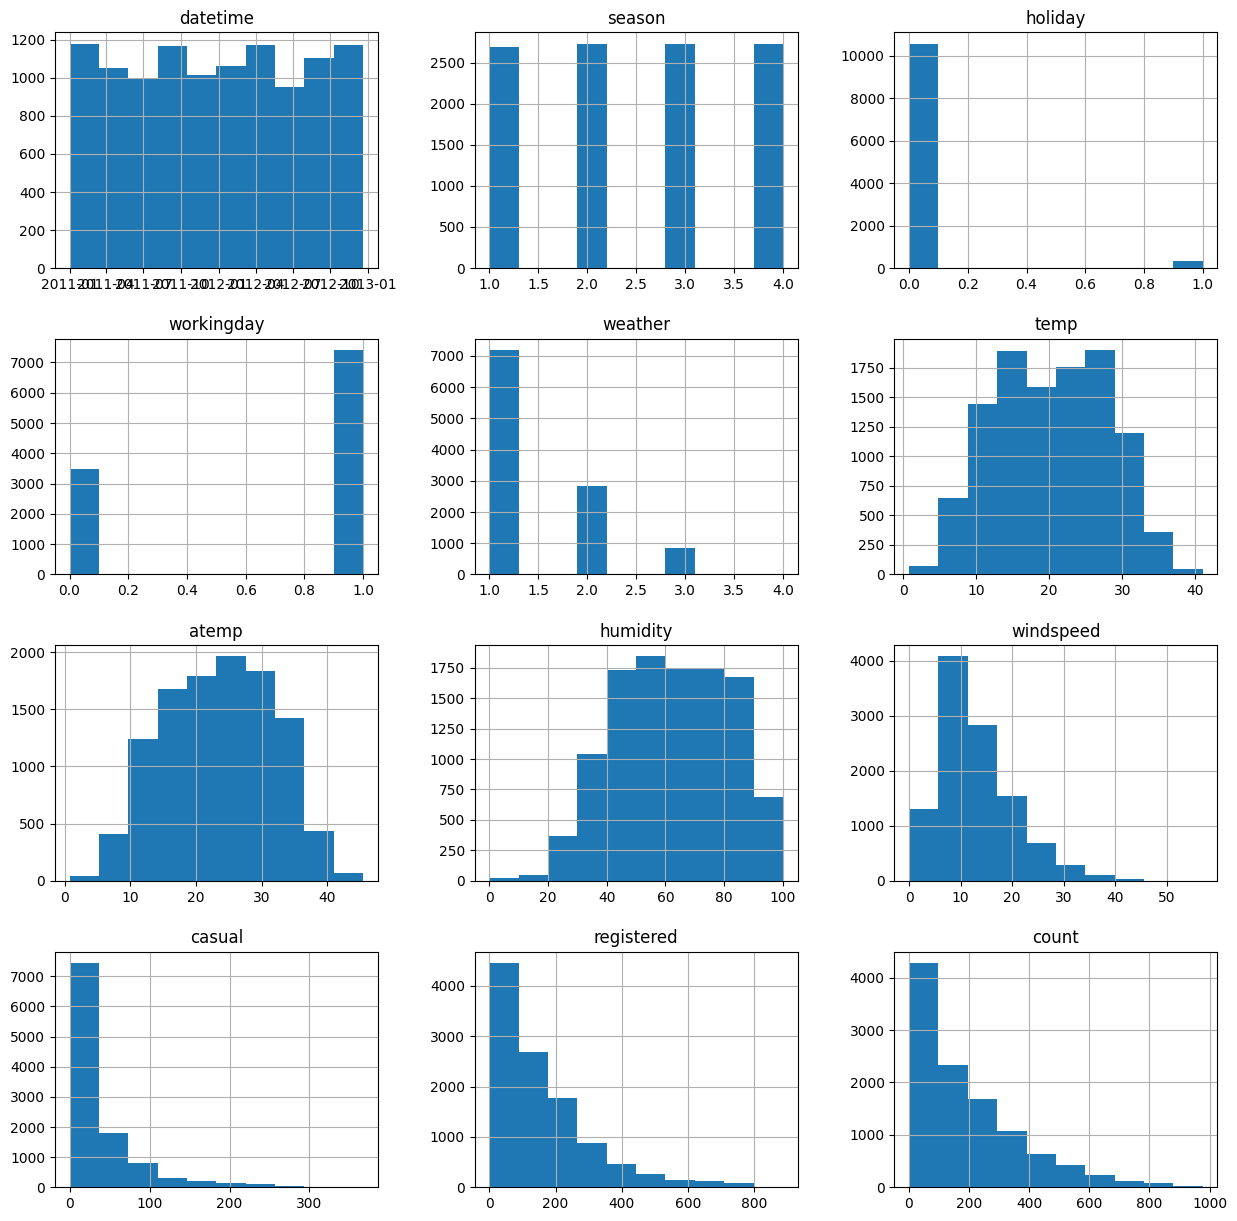

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(15, 15))


In [ ]:
# creating a new feature, trying to split our datetime now
train["hour"] = pd.to_datetime(train["datetime"]).dt.hour
test["hour"] = pd.to_datetime(test["datetime"]).dt.hour

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
 9   hour        6493 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(5)
memory usage: 482.0 KB


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [ ]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'hour'}>, <Axes: >]], dtype=object)

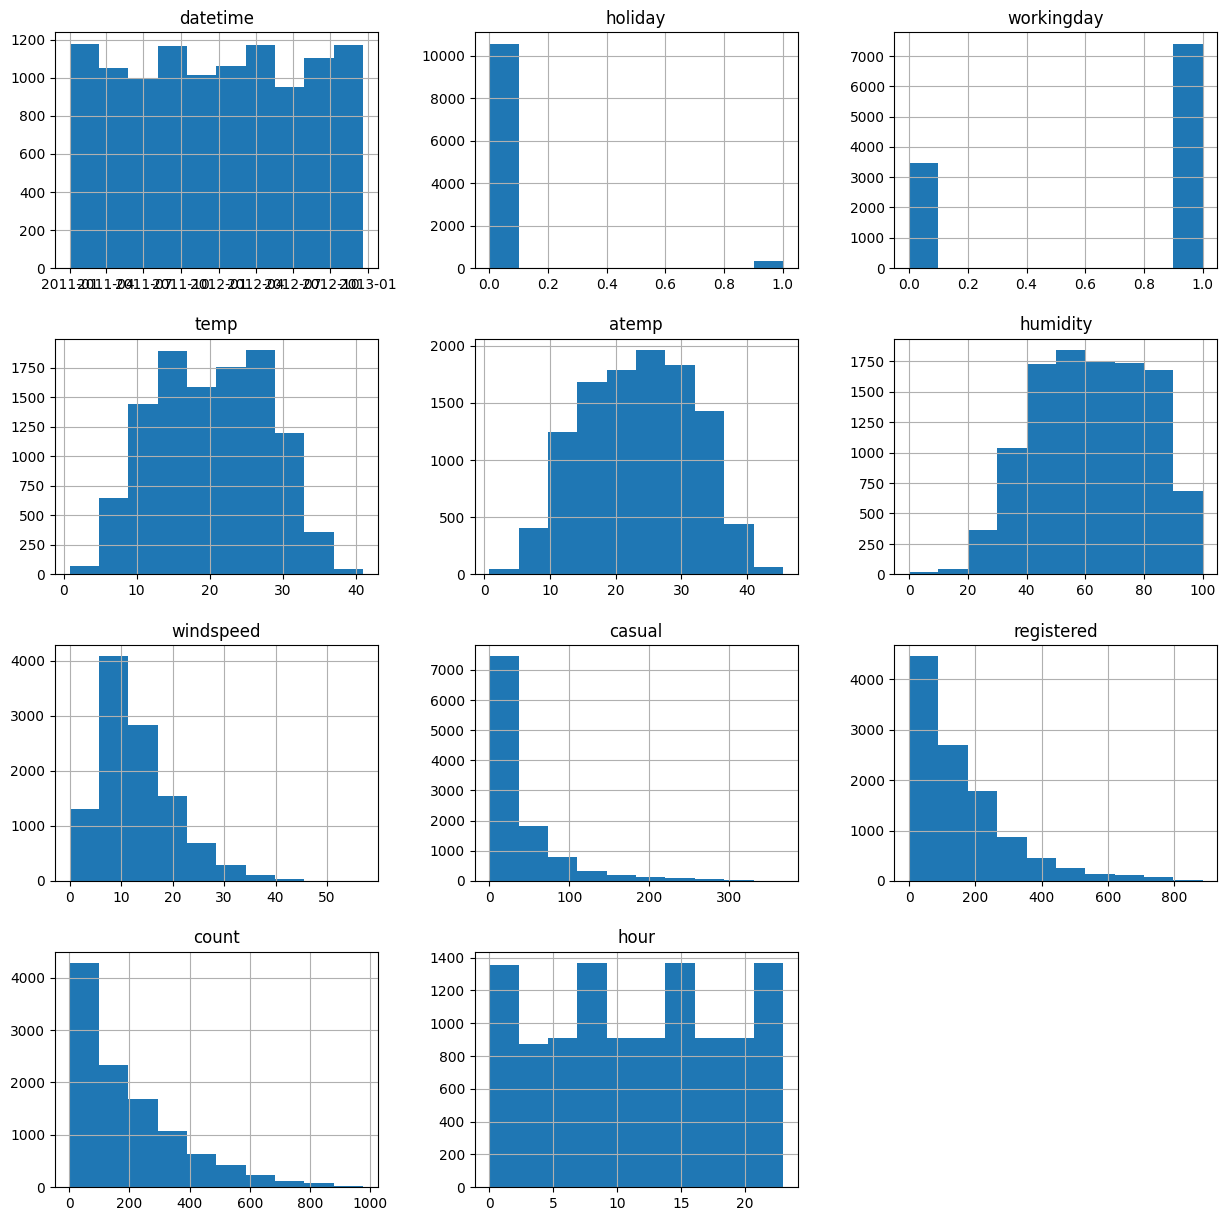

In [ ]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15, 15))

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
predictor_new_features = TabularPredictor(
    label="count",
    problem_type="regression",
    eval_metric="root_mean_squared_error"
    ).fit(
        train.drop(columns=["casual", "registered"]),
        time_limit=600,
        presets="best_quality"
        )

No path specified. Models will be saved in: "AutogluonModels/ag-20250606_174250"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.20 GB / 12.67 GB (80.5%)
Disk Space Avail:   70.53 GB / 112.64 GB (62.6%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.316108  root_mean_squared_error      17.795999  379.062841                0.000655           0.044395            3       True         13
1          LightGBM_BAG_L2  -30.543385  root_mean_squared_error      15.560483  296.138268                0.552960          33.154105            2       True         10
2        LightGBMXT_BAG_L2  -31.189849  root_mean_squared_error      16.623705  301.360472                1.616182          38.376308            2       True          9
3   RandomForestMSE_BAG_L2  -31.758538  root_mean_squared_error      15.626202  307.488032                0.618679          44.503869            2       True         11
4      WeightedEnsemble_L2  -32.307877  root_mean_squared_error      14.303221  256.029379   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': np.float64(-101.54619908446061),
  'KNeighborsDist_BAG_L1': np.float64(-84.12506123181602),
  'LightGBMXT_BAG_L1': np.float64(-34.457273921492806),
  'LightGBM_BAG_L1': np.float64(-33.919639163586254),
  'RandomForestMSE_BAG_L1': np.float64(-38.4543378929

In [ ]:
predictor_new_features.leaderboard(extra_info=True, silent=True)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order,...,hyperparameters,hyperparameters_fit,ag_args_fit,features,compile_time,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants
0,WeightedEnsemble_L3,-30.316108,root_mean_squared_error,17.795999,379.062841,0.000655,0.044395,3,True,13,...,"{'use_orig_features': False, 'valid_stacker': True, 'max_base_models': 0, 'max_base_models_per_type': 'auto', 'save_bag_folds': True, 'stratify': 'auto', 'bin': 'auto', 'n_bins': None}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[LightGBMXT_BAG_L2, LightGBM_BAG_L2, CatBoost_BAG_L1, RandomForestMSE_BAG_L2, LightGBMXT_BAG_L1]",None,"{'ensemble_size': 25, 'subsample_size': 1000000}",{'ensemble_size': 24},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[KNeighborsDist_BAG_L1, LightGBMXT_BAG_L2, LightGBM_BAG_L1, RandomForestMSE_BAG_L1, LightGBM_BAG_L2, ExtraTreesMSE_BAG_L1, KNeighborsUnif_BAG_L1, CatBoost_BAG_L1, RandomForestMSE_BAG_L2, LightGBMXT_BAG_L1]",[]
1,LightGBM_BAG_L2,-30.543385,root_mean_squared_error,15.560483,296.138268,0.552960,33.154105,2,True,10,...,"{'use_orig_features': True, 'valid_stacker': True, 'max_base_models': 0, 'max_base_models_per_type': 'auto', 'save_bag_folds': True, 'stratify': 'auto', 'bin': 'auto', 'n_bins': None}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[KNeighborsDist_BAG_L1, workingday, holiday, datetime.year, temp, datetime.month, LightGBMXT_BAG_L1, humidity, windspeed, KNeighborsUnif_BAG_L1, season, ExtraTreesMSE_BAG_L1, datetime.dayofweek, CatBoost_BAG_L1, datetime, hour, weather, datetime.day, atemp, LightGBM_BAG_L1, RandomForestMSE_BAG_L1]",None,{'learning_rate': 0.05},{'num_boost_round': 358},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': ['bool', 'int', 'float', 'category'], 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None}","[KNeighborsDist_BAG_L1, LightGBM_BAG_L1, RandomForestMSE_BAG_L1, ExtraTreesMSE_BAG_L1, KNeighborsUnif_BAG_L1, CatBoost_BAG_L1, LightGBMXT_BAG_L1]",[WeightedEnsemble_L3]
2,LightGBMXT_BAG_L2,-31.189849,root_mean_squared_error,16.623705,301.360472,1.616182,38.376308,2,True,9,...,"{'use_orig_features': True, 'valid_stacker': True, 'max_base_models': 0, 'max_base_models_per_type': 'auto', 'save_bag_folds': True, 'stratify': 'auto', 'bin': 'auto', 'n_bins': None}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[KNeighborsDist_BAG_L1, wo

In [ ]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

,count
0,16.162916
1,9.898776
2,8.882249
3,7.538758
4,6.710559


In [ ]:
# Remember to set all negative values to zero
predictions_new_features.describe()


,count
count,6493.000000
mean,163.686798
std,146.446747
min,1.493495
25%,48.761662
50%,124.434967
75%,234.149200
max,819.652832


In [ ]:
predictions_new_features[predictions_new_features < 0].sum()

np.float32(0.0)

In [ ]:
# Same submitting predictions
submission_new_features= pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:02<00:00, 91.0kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description           status                     publicScore  privateScore  
---------------------------  --------------------------  --------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-06-06 17:54:39.757000  new features          SubmissionStatus.COMPLETE  0.60859      0.60859       
submission.csv               2025-06-06 17:42:45.863000  first raw submission  SubmissionStatus.COMPLETE  1.79475      1.79475       
submission.csv               2025-06-06 17:18:42.820000  first raw submission  SubmissionStatus.COMPLETE  1.79993      1.79993       
submission.csv               2025-06-06 16:59:08.073000  first raw submission  SubmissionStatus.COMPLETE  1.80009      1.80009       


#### New Score of `0.60859`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
from autogluon.common import space


custom_hyperparameters_hpo = {"RF": {
    'max_depth': space.Int(lower=3, upper=30),
    'max_features': space.Real(lower=0.1, upper=1.0),
    'max_samples': space.Real(lower=0.1, upper=1.0)
}}
predictor_new_hpo = TabularPredictor(
    label='count',
    problem_type='regression',
    eval_metric='root_mean_squared_error',
    ).fit(
        train_data=train.drop(columns=["casual", "registered"]),
        hyperparameters=custom_hyperparameters_hpo,
        hyperparameter_tune_kwargs='auto',
        time_limit=600,
        presets='best_quality'
        )


No path specified. Models will be saved in: "AutogluonModels/ag-20250606_175441"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       9.91 GB / 12.67 GB (78.2%)
Disk Space Avail:   69.55 GB / 112.64 GB (61.7%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be 

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model   score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L3  -36.214893  root_mean_squared_error       3.656163  68.515645                0.000675           0.026088            3       True         69
1   RandomForest_BAG_L2/T16  -36.230170  root_mean_squared_error       2.637581  53.915527                0.377672           3.139003            2       True         68
2   RandomForest_BAG_L2/T13  -36.345119  root_mean_squared_error       2.807064  56.536783                0.547155           5.760258            2       True         65
3    RandomForest_BAG_L2/T7  -36.376118  root_mean_squared_error       3.024280  57.261933                0.764371           6.485408            2       True         59
4    RandomForest_BAG_L2/T8  -36.382037  root_mean_squared_error       2.730661  59.590295   

{'model_types': {'RandomForest_BAG_L1/T1': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T2': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T3': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T4': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T5': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T6': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T7': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T8': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T9': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T10': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T11': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T12': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T13': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T14': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T15': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T16': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T17': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T18': 'StackerEnsem

In [ ]:
predictor_new_hpo.leaderboard(extra_info=True, silent=True)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order,...,hyperparameters,hyperparameters_fit,ag_args_fit,features,compile_time,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants
0,WeightedEnsemble_L3,-36.214893,root_mean_squared_error,3.656163,68.515645,0.000675,0.026088,3,True,69,...,"{'use_orig_features': False, 'valid_stacker': True, 'max_base_models': 0, 'max_base_models_per_type': 'auto', 'save_bag_folds': True, 'stratify': 'auto', 'bin': 'auto', 'n_bins': None}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[RandomForest_BAG_L2/T8, RandomForest_BAG_L2/T13, RandomForest_BAG_L2/T16]",None,"{'ensemble_size': 25, 'subsample_size': 1000000}",{'ensemble_size': 24},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[RandomForest_BAG_L2/T8, RandomForest_BAG_L2/T13, RandomForest_BAG_L1/T49, RandomForest_BAG_L1/T11, RandomForest_BAG_L1/T22, RandomForest_BAG_L2/T16, RandomForest_BAG_L1/T36]",[]
1,RandomForest_BAG_L2/T16,-36.230170,root_mean_squared_error,2.637581,53.915527,0.377672,3.139003,2,True,68,...,"{'use_orig_features': True, 'valid_stacker': True, 'max_base_models': 0, 'max_base_models_per_type': 'auto', 'save_bag_folds': True, 'stratify': 'auto', 'bin': 'auto', 'n_bins': None, 'use_child_oof': True}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[season, RandomForest_BAG_L1/T49, datetime.day, atemp, humidity, workingday, holiday, RandomForest_BAG_L1/T11, RandomForest_BAG_L1/T22, windspeed, datetime.year, temp, datetime.dayofweek, RandomForest_BAG_L1/T36, datetime, hour, datetime.month, weather]",None,"{'n_estimators': 300, 'max_leaf_nodes': 15000, 'n_jobs': -1, 'random_state': 0, 'bootstrap': True, 'max_depth': 9, 'max_features': 0.3000892494264289, 'max_samples': 0.4478400830132757}",{'n_estimators': 300},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': ['bool', 'int', 'float', 'category'], 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None}","[RandomForest_BAG_L1/T36, RandomForest_BAG_L1/T11, RandomForest_BAG_L1/T22, RandomForest_BAG_L1/T49]",[WeightedEnsemble_L3]
2,RandomForest_BAG_L2/T13,-36.345119,root_mean_squared_error,2.807064,56.536783,0.547155,5.760258,2,True,65,...,"{'use_orig_features': True, 'valid_stacker': True, 'max_base_models': 0, 'max_base_models_per_type': 'auto', 'save_bag_folds': True, 'stratify': 'auto', 'bin': 'auto', 'n_bins': None, 'use_child_oof': True}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temper

In [ ]:
predictions_new_hpo= predictor_new_hpo.predict(test)
predictions_new_hpo.head()

,count
0,12.871130
1,5.820553
2,4.479212
3,2.953668
4,2.793705


In [ ]:
# Remember to set all negative values to zero
predictions_new_hpo.describe()

,count
count,6493.000000
mean,194.166336
std,174.044678
min,2.424862
25%,50.257675
50%,151.731079
75%,284.734772
max,905.878601


In [ ]:
#negative values
predictions_new_hpo[predictions_new_hpo<0].sum()

np.float32(0.0)

In [ ]:
# Same submitting predictions
submission_new_hpo = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:02<00:00, 91.0kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2025-06-06 18:06:19.937000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.47984      0.47984       
submission_new_features.csv  2025-06-06 17:54:39.757000  new features                       SubmissionStatus.COMPLETE  0.60859      0.60859       
submission.csv               2025-06-06 17:42:45.863000  first raw submission               SubmissionStatus.COMPLETE  1.79475      1.79475       
submission.csv               2025-06-06 17:18:42.820000  first raw submission               SubmissionStatus.COMPLETE  1.79993      1.79993       


#### New Score of `0.47984`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

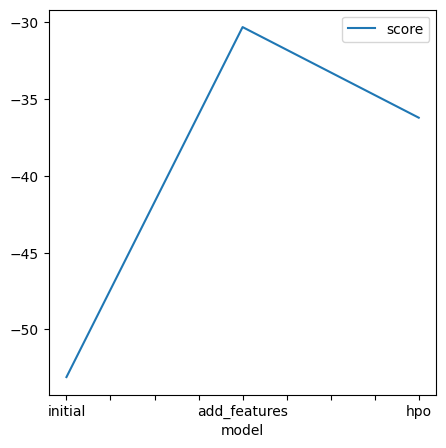

In [52]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-53.099358, -30.316108, -36.214893]
    }
).plot(x="model", y="score", figsize=(5,5)).get_figure()
fig.savefig('model_train_score.png')

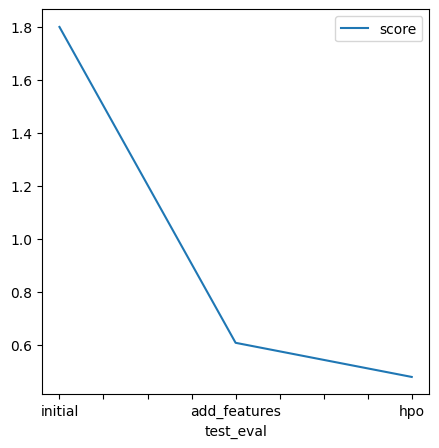

In [51]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.79993, 0.60859, 0.47984]
    }
).plot(x="test_eval", y="score", figsize=(5,5)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [50]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["default", "default", "max_depth"],
    "hpo2": ["default", "default", "max_features"],
    "hpo3": ["default", "default", "max_samples"],
    "score": [1.79993, 0.60859, 0.47984]
})

,model,hpo1,hpo2,hpo3,score
0,initial,default,default,default,1.79993
1,add_features,default,default,default,0.60859
2,hpo,max_depth,max_features,max_samples,0.47984
